In [ ]:
! git clone https://github.com/matteobreschi/bajes.git

In [ ]:
!pip install pycbc lalsuite ligo-common
!pip install gwpy

import gwpy
from gwpy.timeseries import TimeSeries

In [ ]:
%cd bajes
! ls
! python setup.py install

In [3]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
from bajes.obs.gw import Series
from bajes.obs.gw import Noise
from bajes.obs.gw.utils import read_asd

In [4]:
time_of_event = 1126259462

post_trigger_duration =4
duration = 8
analysis_start = time_of_event + post_trigger_duration - duration

# Use gwpy to fetch the open data
H1_analysis_data = TimeSeries.fetch_open_data(
    "H1", analysis_start, analysis_start + duration, sample_rate=4096, cache=True)

t = H1_analysis_data.times
strain = H1_analysis_data.value

# set the data properties coherently
seglen = 8           # duration of the segment [s]
srate  = 4096         # sampling rate [Hz]
t_gps  = 1126259462   # central value of GPS time
f_max  = 1024
f_min  = 20 


series = Series('time', strain, seglen=seglen, srate=srate, t_gps=t_gps, f_min=f_min, f_max=f_max)


from bajes.obs.gw import Noise
from bajes.obs.gw.utils import read_asd

fr_asd, asd = read_asd('GW150914', 'H1')
noise       = Noise(fr_asd, asd, f_min=0, f_max=f_max)

In [ ]:
from bajes.obs.gw import Detector, Waveform

w  = Waveform(series.freqs, srate, seglen, 'NRPM')

In [52]:
#easily figure out chirp mass and mass ratio of differing solar masses
import math

m1 = 3
m2 = 1

chirp_mass = (math.pow((m1 * m2), (3/5))) / (math.pow((m1 + m2), (1/5)))
q = m1 / m2  #m1 has to be the bigger number

print(chirp_mass)
print(q)

1.4650780257917608
3.0


/content/bajes/bajes/obs/gw/approx/nrpm.py:46: RuntimeWarning: divide by zero encountered in log
  alpha = np.log(100 * b3/bmerg)/(tc-t3)


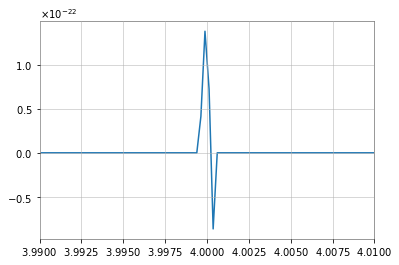

In [55]:

pars = {'mchirp': 1.47,                      #chirp mass [solar masses]
        'q': 3,                             #mass ratio
        's1z': 0.,                          #primary spin parameter, x component
        's2z': 0.,                          #primary spin parameter, y component
        's1x': 0.,                          #primary spin parameter, z component
        's2x': 0.,                          #secondary spin parameter, x component
        's1y': 0.,                          #secondary spin parameter, y component
        's2y': 0.,                          #secondary spin parameter, z component
        'lambda1':400,                      # primary tidal parameter 
        'lambda2':400,                      # secondary tidal parameter
        'iota'       : np.pi,               # inclination [rad] 
        'ra'         : 1.7,                 # right ascension [rad]
        'dec'        : -0.75,               # declination [rad]
        'psi'        : 0.,                  # polarization angle [rad]
        'time_shift' : 0.419,               # time shift from GPS time [s]
        'f_min':30,                         # minimum frequency [Hz]
        'srate':srate,                      # sampling rate [Hz]
        'distance': 100.8114416513031, 
        'phi_ref':0,
        'tukey':0.1,                        # parameter for tukey window 
        'seglen': seglen,                   # segment duration [s] 
        't_gps'      : t_gps   # GPS trigger time 
}

hp, hc = w.compute_hphc(pars)
t = np.linspace(0, len(hp)/srate, len(hp))
plt.plot(t, hp)
plt.xlim(4-0.01, 4+0.01)
plt.show()